In [57]:
# Download the MNISt dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

C:\Users\sawan\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [58]:
# Load the data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [59]:
X, y = mnist['data'], mnist['target']

In [60]:
X.shape

(70000, 784)

In [61]:
y.shape

(70000,)

In [62]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

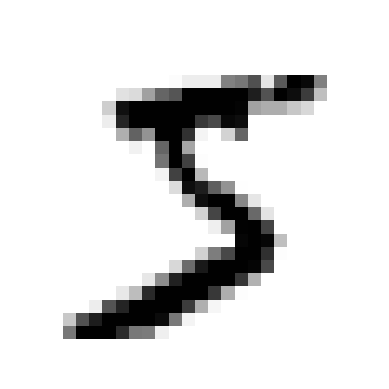

In [63]:
# Show the number 5
some_digit = X[0]
plot_digit(some_digit)
plt.show()

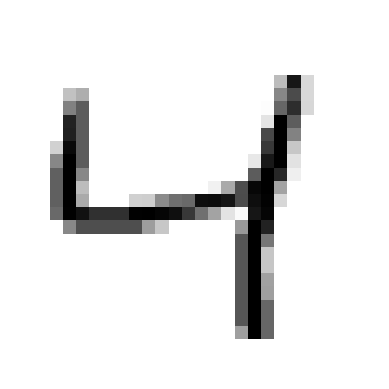

In [64]:
# show the number 9
some_digit = X[2]
plot_digit(some_digit)
plt.show()

In [65]:
y[0]

'5'

In [66]:
y = y.astype(np.uint8)

In [67]:
y[0]

5

In [68]:
# Split the data in the train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [69]:
# Let's identify the number 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [70]:
# Train the model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [71]:
# Test the model
sgd_clf.predict([some_digit])

array([False])

In [72]:
# Evaluate the model
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [73]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print('Dummy classifier accuracy:', cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy').mean())

Dummy classifier accuracy: 0.90965


In [74]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [75]:
# Confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [77]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In the above result 53892 are correctly classified as non-5s (true negatives), while the remaining 687 are wrongly classified as 5s (false positives). 1891 were wrongly classified as non-5s (false negatives), while the remaining 3530 were correctly classified as 5s (true positives).

In [78]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [79]:
# Precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [80]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [81]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [82]:
# Precision recall curve
# SGD classifier
y_score = sgd_clf.decision_function([some_digit])
y_score

array([-13489.14805779])

In [83]:
threshold = 0

In [84]:
y_some_digit_pred = (y_score > threshold)

In [85]:
y_some_digit_pred

array([False])

In [86]:
threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [87]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [88]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [89]:
# Plot the precision recall curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.vlines(threshold, 0, 1, colors='r', linestyles='dotted', label='Threshold')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0, 1])

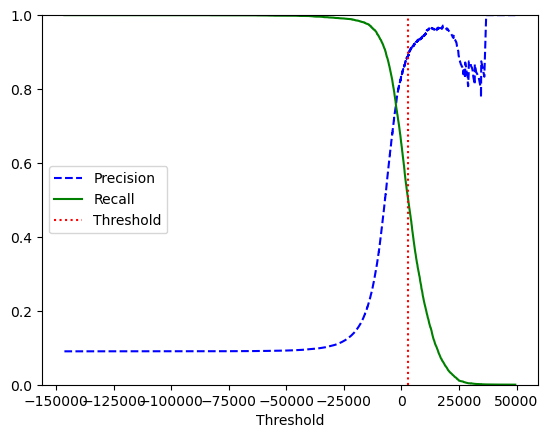

In [90]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0.5, 1.0, 'Precision-Recall Curve')

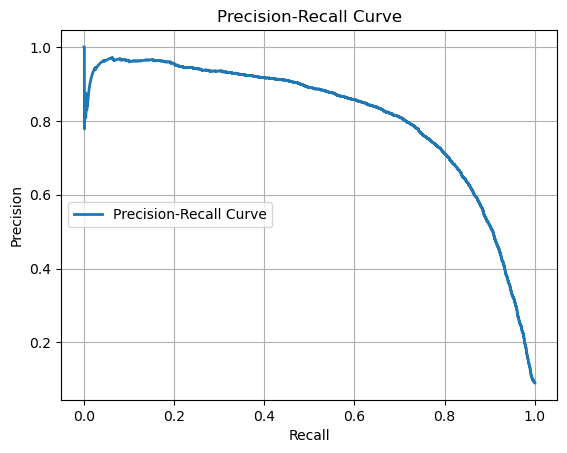

In [91]:
plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall Curve')
# add grid and legend, labels, and text
plt.grid()
plt.legend(loc='center left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [92]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [93]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    

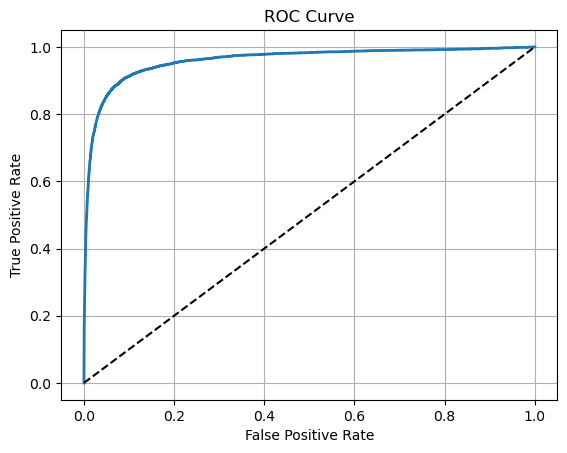

In [94]:
plot_roc_curve(fpr, tpr)

In [95]:
# Compute the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [96]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [97]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [98]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [99]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

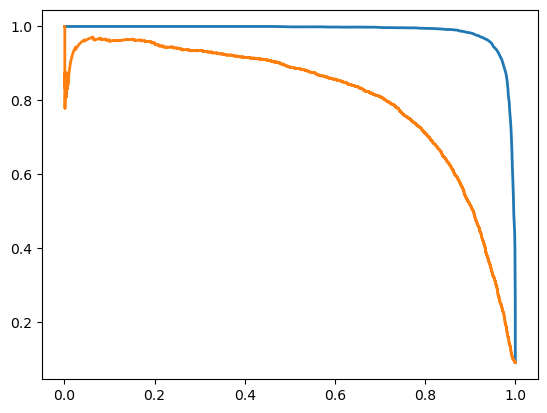

In [100]:
plt.plot(recalls_forest, precisions_forest, linewidth=2, label='Precision-Recall Curve')
plt.plot(recalls, precisions, linewidth=2, label='SGD Precision-Recall Curve')

In [101]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [102]:
svm_clf.predict([X[0]])

array([5], dtype=uint8)

In [103]:
X_0_digit_scores = svm_clf.decision_function([X[0]])

In [104]:
X_0_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [105]:
# OnevsRestClassifier

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [106]:
ovr_clf.predict([X[0]])

array([5], dtype=uint8)

In [107]:
len(ovr_clf.estimators_)

10

In [108]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [109]:
sgd_clf.predict([X[0]])

array([3], dtype=uint8)

In [110]:
# scaling the input
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train.astype(np.float64))

In [111]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

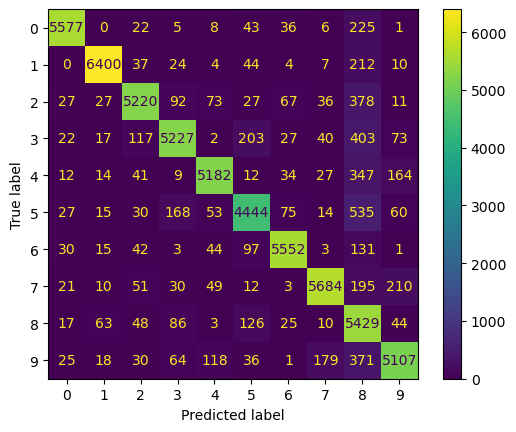

In [113]:
# Error analysis
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

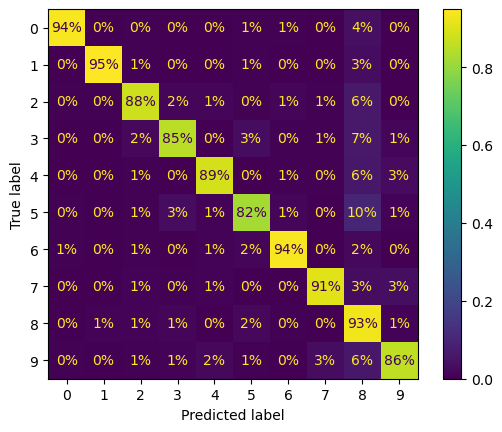

In [114]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')

In [115]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

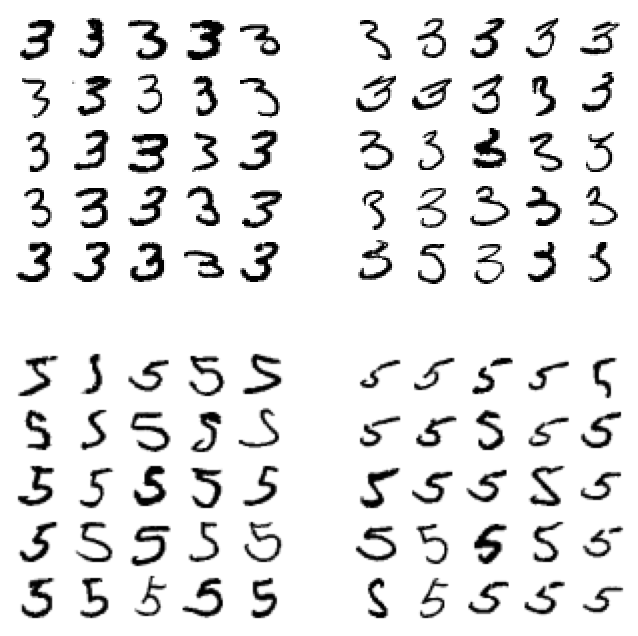

In [116]:
# create plot_digits function
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis('off')

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [117]:
# Multilabel classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [118]:
knn_clf.predict([X[0]])

array([[False,  True]])

In [119]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [120]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [121]:
# Create classification chain
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [122]:
chain_clf.predict([X[0]])

array([[0., 1.]])

In [123]:
# Multioutput classification
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

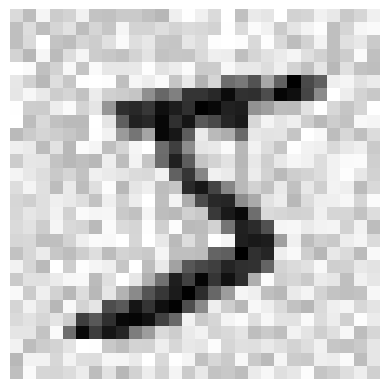

In [124]:
plot_digit(X_train_mod[0])

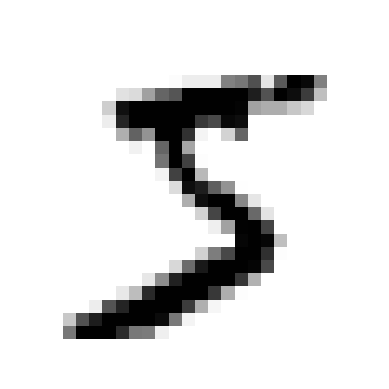

In [125]:
plot_digit(y_train_mod[0])

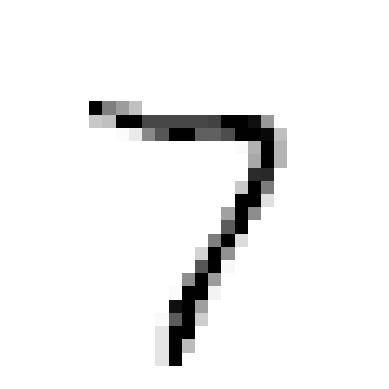

In [126]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[0]])

plot_digit(clean_digit)
plt.show()